In [ ]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sys
terminal = sys.stdout 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# import sys
# f = open("file.txt", "w")
# f.write("The test works!!")
# !cp f

# attempting to save colab file to shared google drive

# import sys
# f = open("file.txt", "w")
# f.write("The")
# !cp f

# with open('/content/drive/My Drive/file.txt', 'w') as f:
#  f.write('testing')

# import shutil
# colab_link = "/content/filename.type"
# gdrive_link = "/content/drive/MyDrive/Shared with me/Colab Notebooks/Models"
# shutil.copy(colab_link, gdrive_link)

Mounted at /content/drive


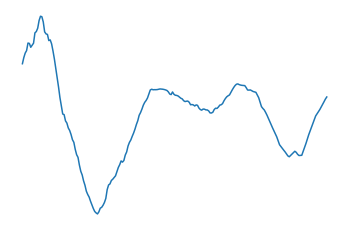

In [ ]:
import h5py

file = "/content/drive/My Drive/Colab Notebooks/dataset_comp_image_spectra.h5"
# file = "/content/drive/Shared with me/Colab Notebooks/dataset_comp_image_spectra.h5"
hf = h5py.File(file, 'r')
#for i in range(100):
#  data = hf['spectra'][i]
#  print(i)
#  plt.plot(data)
#  plt.show()
i = 59
data = hf['spectra'][i]
plt.plot(data)
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')
plt.show()

In [ ]:
import h5py

file = "/content/drive/My Drive/Colab Notebooks/dataset_comp_image_spectra.h5"
# file = "/content/drive/Shared with me/Colab Notebooks/dataset_comp_image_spectra.h5"
hf = h5py.File(file, 'r')

def h5_items(file):
    for key in file:
        if isinstance(file[key],h5py.Dataset):
                print('' + key + ':' + str(file[key].shape))
        else:
            print('' + key)
            h5_items(file[key])
subsetSize=5000
sample = hf["sample_id"][0:subsetSize]
imgs = hf['images'][0:subsetSize]
spectra = hf['spectra'][0:subsetSize]
spectra = np.array([x[::11] for x in spectra])
x_train, x_test, y_train, y_test = train_test_split(imgs, spectra, test_size = 0.2, random_state = None)

In [ ]:
#gave best validation graph
def get_conv_model_normal():

    model = tf.keras.Sequential([
    #tf.keras.layers.BatchNormalization(),                             
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(units=20, activation=None)
    ])
    model.summary()
    model.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(), optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
#gave best looking predicted graphs
def get_conv_model_normal():

    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(units=20, activation=None)
    ])
    model.summary()
    model.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(), optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
from keras.backend import softsign
from keras import metrics
# Testing Model
def get_conv_model_normal():

    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(units=20, activation= 'softsign')])
    #tf.keras.layers.Dropout(rate = .6 , noise_shape=None, seed=None)
    model.summary()
    model.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(), optimizer = 'adam', metrics = [metrics.mean_squared_logarithmic_error, metrics.mean_absolute_percentage_error])
    return model

In [ ]:
epochs = 50
batch_size = 32
sys.stdout = open('EpochOutput.txt', 'w')
normal_model = get_conv_model_normal()
normal_history = normal_model.fit(x_train, y_train, batch_size = batch_size,
                epochs = epochs, validation_data = (x_test, y_test), verbose= 1)
normal_model.save('Model.h5')
sys.stdout = terminal

In [ ]:
normal_history.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_logarithmic_error', 'val_mean_absolute_percentage_error'])

In [ ]:
# Use this if we want to load an already built model
normal_model = load_model('Model.h5')

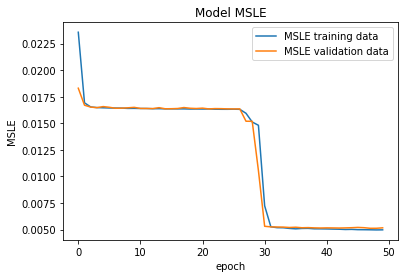

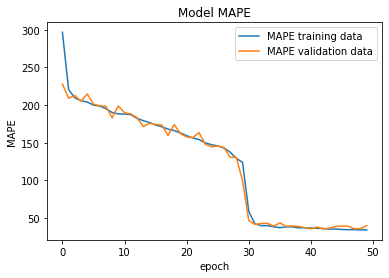

In [ ]:
#plt.plot(normal_history.history['accuracy'], label='Accuracy training data')
#plt.plot(normal_history.history['val_accuracy'], label='Accuracy validation data')
plt.plot(normal_history.history['mean_squared_logarithmic_error'], label='MSLE training data')
plt.plot(normal_history.history['val_mean_squared_logarithmic_error'], label='MSLE validation data')
plt.legend()
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('epoch')
plt.savefig('ModelAccuracyMSLE.jpg')
plt.show()
plt.plot(normal_history.history['mean_absolute_percentage_error'], label='MAPE training data')
plt.plot(normal_history.history['val_mean_absolute_percentage_error'], label='MAPE validation data')
plt.legend()
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.savefig('ModelAccuracyMAPE.jpg')

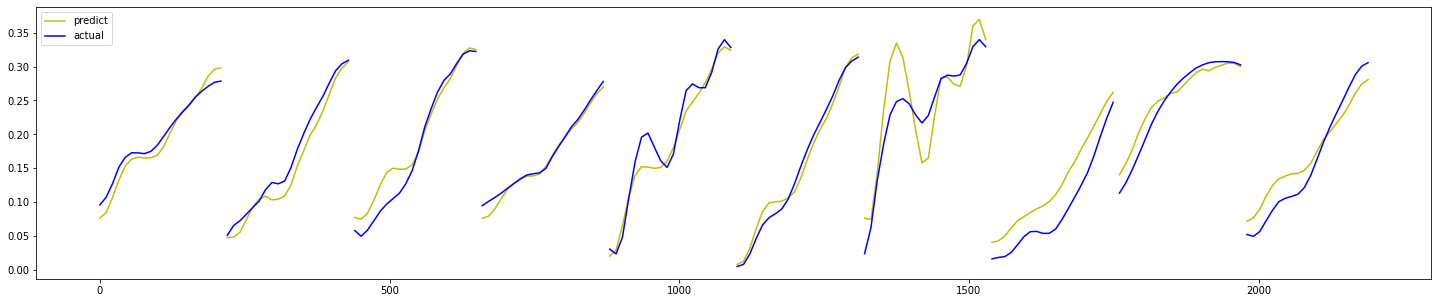

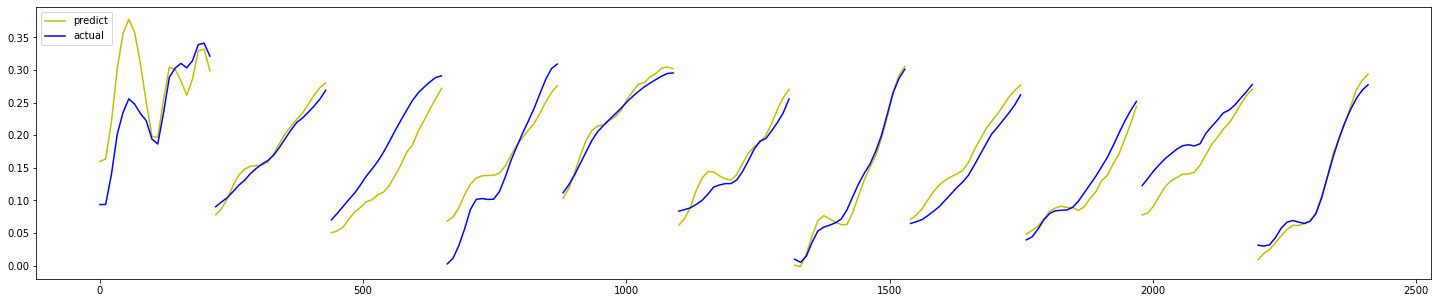

In [ ]:
import random
#Make First 10 images on 1 graph
x = np.array([x for x in range(0,220,11)])
y = normal_model.predict(x_train)
fig = plt.figure(figsize=(25, 5))
for i in range(10):
  plt.plot(x + 220*i, y[i] , color = 'y')
  plt.plot(x + 220*i, y_train[i], color = 'b')
  plt.legend(['predict', 'actual'], loc='upper left')
plt.savefig('First10.jpg')
plt.show()

#Make Random 10 images on 1 graph
rando = [x for x in range(10, len(y))]
random.shuffle(rando)
i = 0
fig = plt.figure(figsize=(25, 5))
for rand in rando:
  if i > 10:
    break
  plt.plot(x + 220*i, y[rand], color = 'y')
  plt.plot(x + 220*i, y_train[rand], color = 'b')
  plt.legend(['predict', 'actual'], loc='upper left')
  i+=1
plt.savefig('Random10.jpg')
plt.show()

In [ ]:
import random
#Make First 10 predictions all on the same graph
x = np.array([x for x in range(0,220,11)])
predictList = makePredictions(modelList, x_train)
y = [ensemblePredict(predictList, ele) for ele in range(len(x_train))]
fig = plt.figure(figsize=(25, 5))
for i in range(10):
  plt.plot(x, y[i] , color = 'y')
  plt.plot(x, y_train[i], color = 'b')
  plt.legend(['predict', 'actual'], loc='upper left')
plt.savefig('AllPredictions.jpg')
plt.show()

NameError: ignored

In [ ]:
# this uploads the colab_link to your google drive and the files will be in models

import shutil
names = ['EpochOutput.txt', 'First10.jpg', 'ModelAccuracy.jpg', 'Model.h5', 'Random10.jpg']
names = ['EpochOutput.txt', 'First10.jpg', 'ModelAccuracy.jpg', 'Random10.jpg', 'AllPredictions.jpg']
for name in names:
  colab_link = name
  gdrive_link = "/content/drive/My Drive/Colab Notebooks/Models"
  shutil.copy(colab_link, gdrive_link)

SyntaxError: ignored